# Temperature Forecast Project using ML

### Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

#### Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv(r"C:\Users\chaud\Downloads\temperature.csv")
df.head(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [30]:
df.shape

(7752, 25)

In [31]:
df.duplicated().sum()

0

In [32]:
df['station'].nunique()

25

In [33]:
df.isin([' ','NAN','NA','-']).sum().any()

False

- No Duplicate entry in dataset.
- No whitespace,NAN,  NA, '-' exist in dataset.

#### Checking Null values in dataset

In [34]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

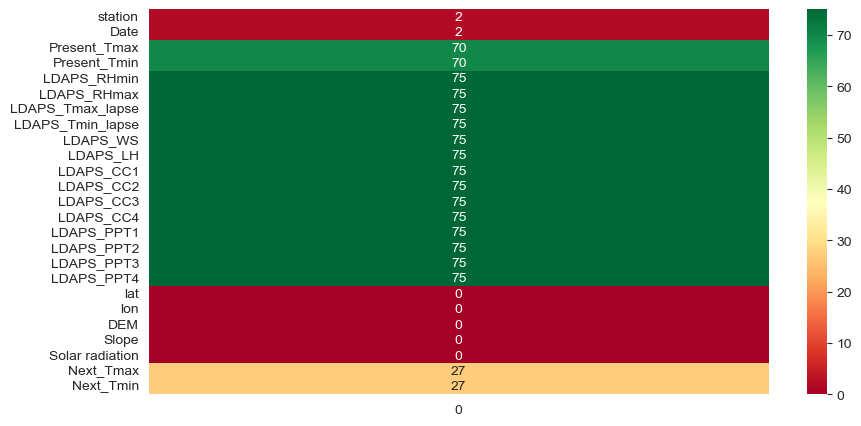

In [35]:
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull().sum().to_frame(), cmap ='RdYlGn' , annot= True)
plt.show()

In [36]:
percent_missing_data = df.isnull().sum() * 100 / len(df)
percent_missing_data.sort_values(ascending = False, inplace=True)
pd.DataFrame({'percent missing data': percent_missing_data })

,percent missing data
LDAPS_CC3,0.967492
LDAPS_PPT4,0.967492
LDAPS_PPT2,0.967492
LDAPS_PPT1,0.967492
LDAPS_CC4,0.967492
LDAPS_CC2,0.967492
LDAPS_CC1,0.967492
LDAPS_LH,0.967492
LDAPS_WS,0.967492
LDAPS_Tmin_lapse,0.967492


#### Converting null values and dropping it

In [37]:
impute_techniques = {
    'Present_Tmax' : 'mean',
    'Present_Tmin': 'mean' , 
    'LDAPS_RHmin' : 'mean',
    'LDAPS_RHmax' : 'mean',
    'LDAPS_Tmax_lapse' : 'mean',
    'LDAPS_Tmin_lapse': 'mean', 
    'LDAPS_WS' : 'mean',
    'LDAPS_LH' : 'mean',  
    'LDAPS_CC1' : 'mean',   
    'LDAPS_CC2' : 'mean',
    'LDAPS_CC3' : 'mean' , 
    'LDAPS_CC4' : 'mean',
    'LDAPS_PPT1' : 'mean',
    'LDAPS_PPT2' : 'mean',
    'LDAPS_PPT3' : 'mean',
    'LDAPS_PPT4' :'mean'
}
for column, Technique in impute_techniques.items():
    
    if Technique == 'mean':
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

df.head(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [38]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [39]:
df.dropna(inplace=True)

In [40]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [58]:
df.shape

(7723, 27)

Converting date datatype and splitting date into date, month, year

In [41]:
df['Date']=pd.to_datetime(df['Date'])


In [42]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [43]:
df.drop(columns=['Date'],inplace=True)

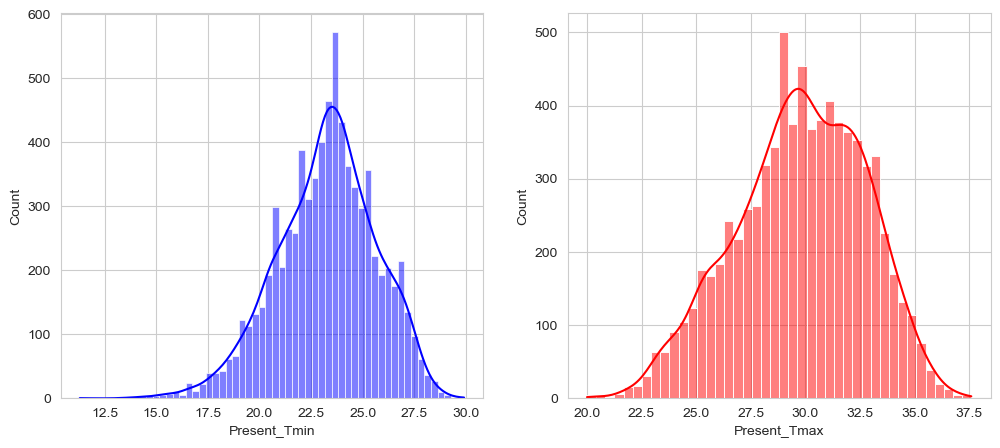

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmin'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.show()

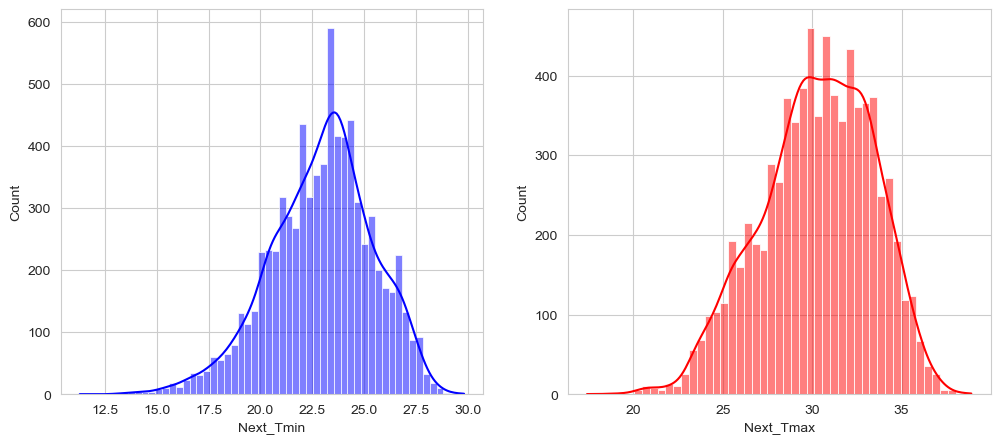

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmin'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmax'],kde=True,color='r')
plt.show()

## Visualization of maximum temperature over year

(array([28.75, 29.  , 29.25, 29.5 , 29.75, 30.  , 30.25, 30.5 , 30.75,
        31.  , 31.25]),
 [Text(0, 28.75, '28.75'),
  Text(0, 29.0, '29.00'),
  Text(0, 29.25, '29.25'),
  Text(0, 29.5, '29.50'),
  Text(0, 29.75, '29.75'),
  Text(0, 30.0, '30.00'),
  Text(0, 30.25, '30.25'),
  Text(0, 30.5, '30.50'),
  Text(0, 30.75, '30.75'),
  Text(0, 31.0, '31.00'),
  Text(0, 31.25, '31.25')])

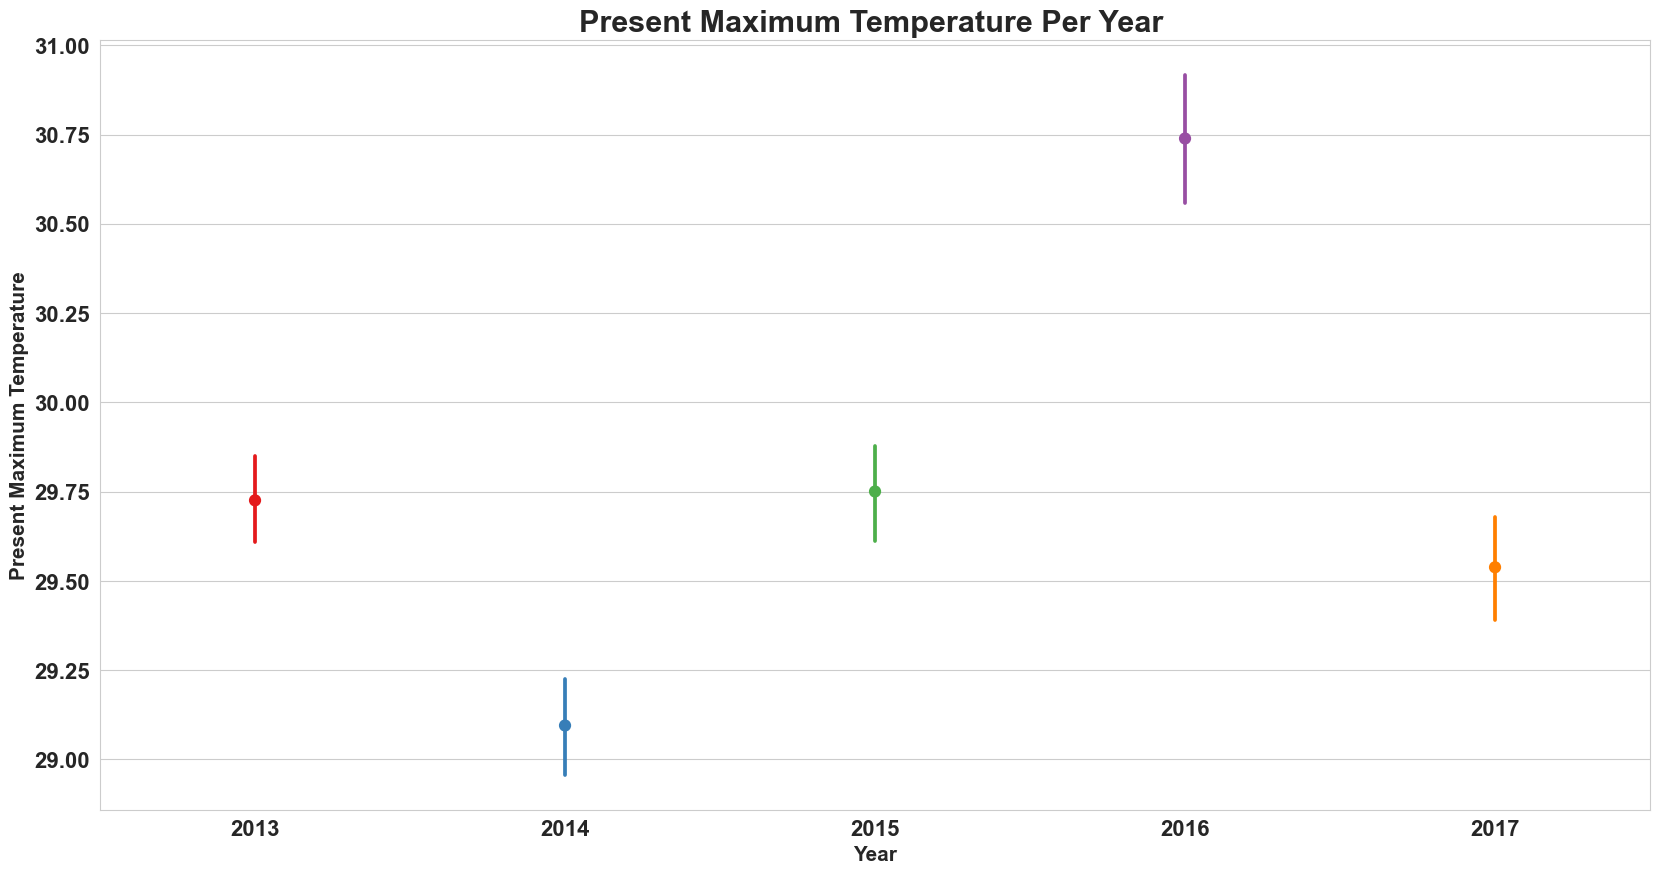

In [46]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='Year', y='Present_Tmax', data=df, palette = "Set1")
plt.title('Present Maximum Temperature Per Year ', fontsize=22, fontweight='bold')
plt.xlabel('Year',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
#plt.legend(fontsize=14)

- ##### We can see 2016 is hottest year and 2014 is coolest year. 
- ##### Year 2017 is much cooler compare to Year 2016

(array([22.  , 22.25, 22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  ,
        24.25]),
 [Text(0, 22.0, '22.00'),
  Text(0, 22.25, '22.25'),
  Text(0, 22.5, '22.50'),
  Text(0, 22.75, '22.75'),
  Text(0, 23.0, '23.00'),
  Text(0, 23.25, '23.25'),
  Text(0, 23.5, '23.50'),
  Text(0, 23.75, '23.75'),
  Text(0, 24.0, '24.00'),
  Text(0, 24.25, '24.25')])

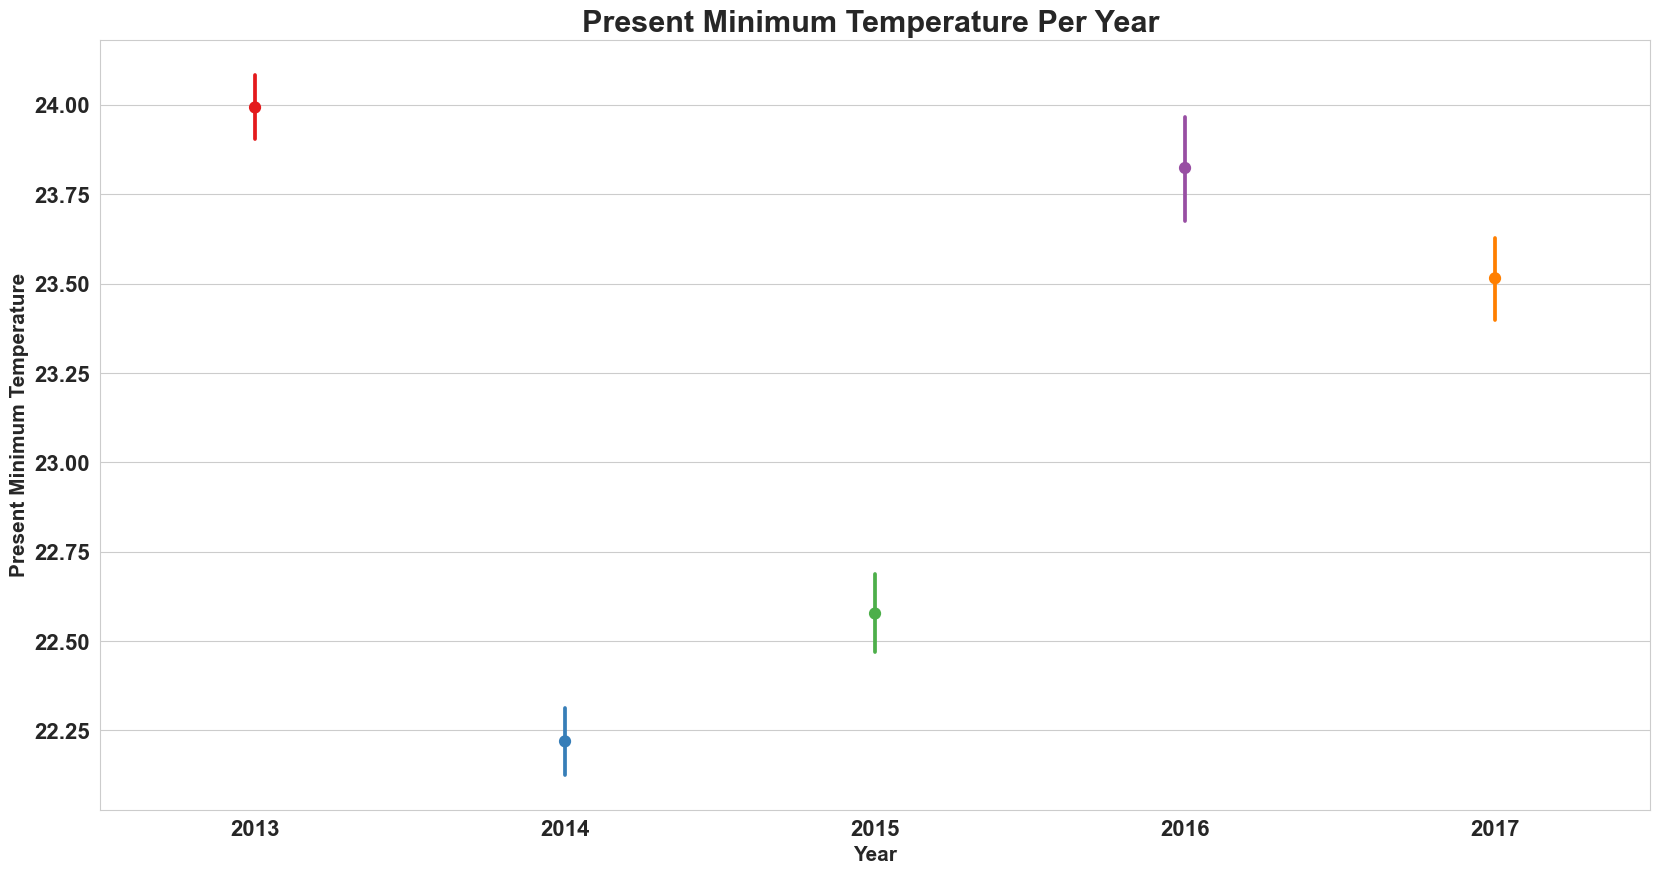

In [47]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='Year', y='Present_Tmin', data=df, palette = "Set1")
plt.title('Present Minimum Temperature Per Year ', fontsize=22, fontweight='bold')
plt.xlabel('Year',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
#plt.legend(fontsize=14)

- Year 2014 is coolest year of all time frame.
- year 2013 is less coolest compared to other years 

<Axes: xlabel='Month', ylabel='Solar radiation'>

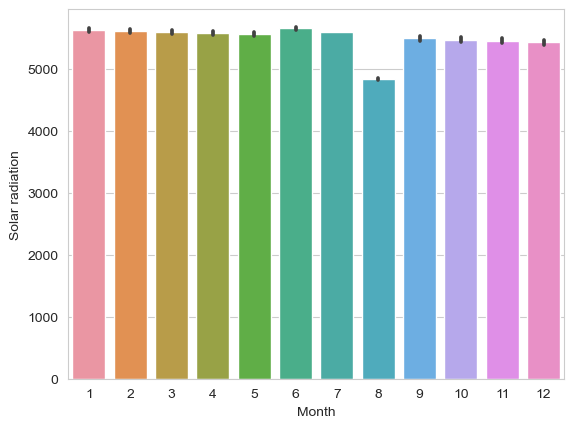

In [48]:
sns.barplot(x=df['Month'], y=df['Solar radiation'])


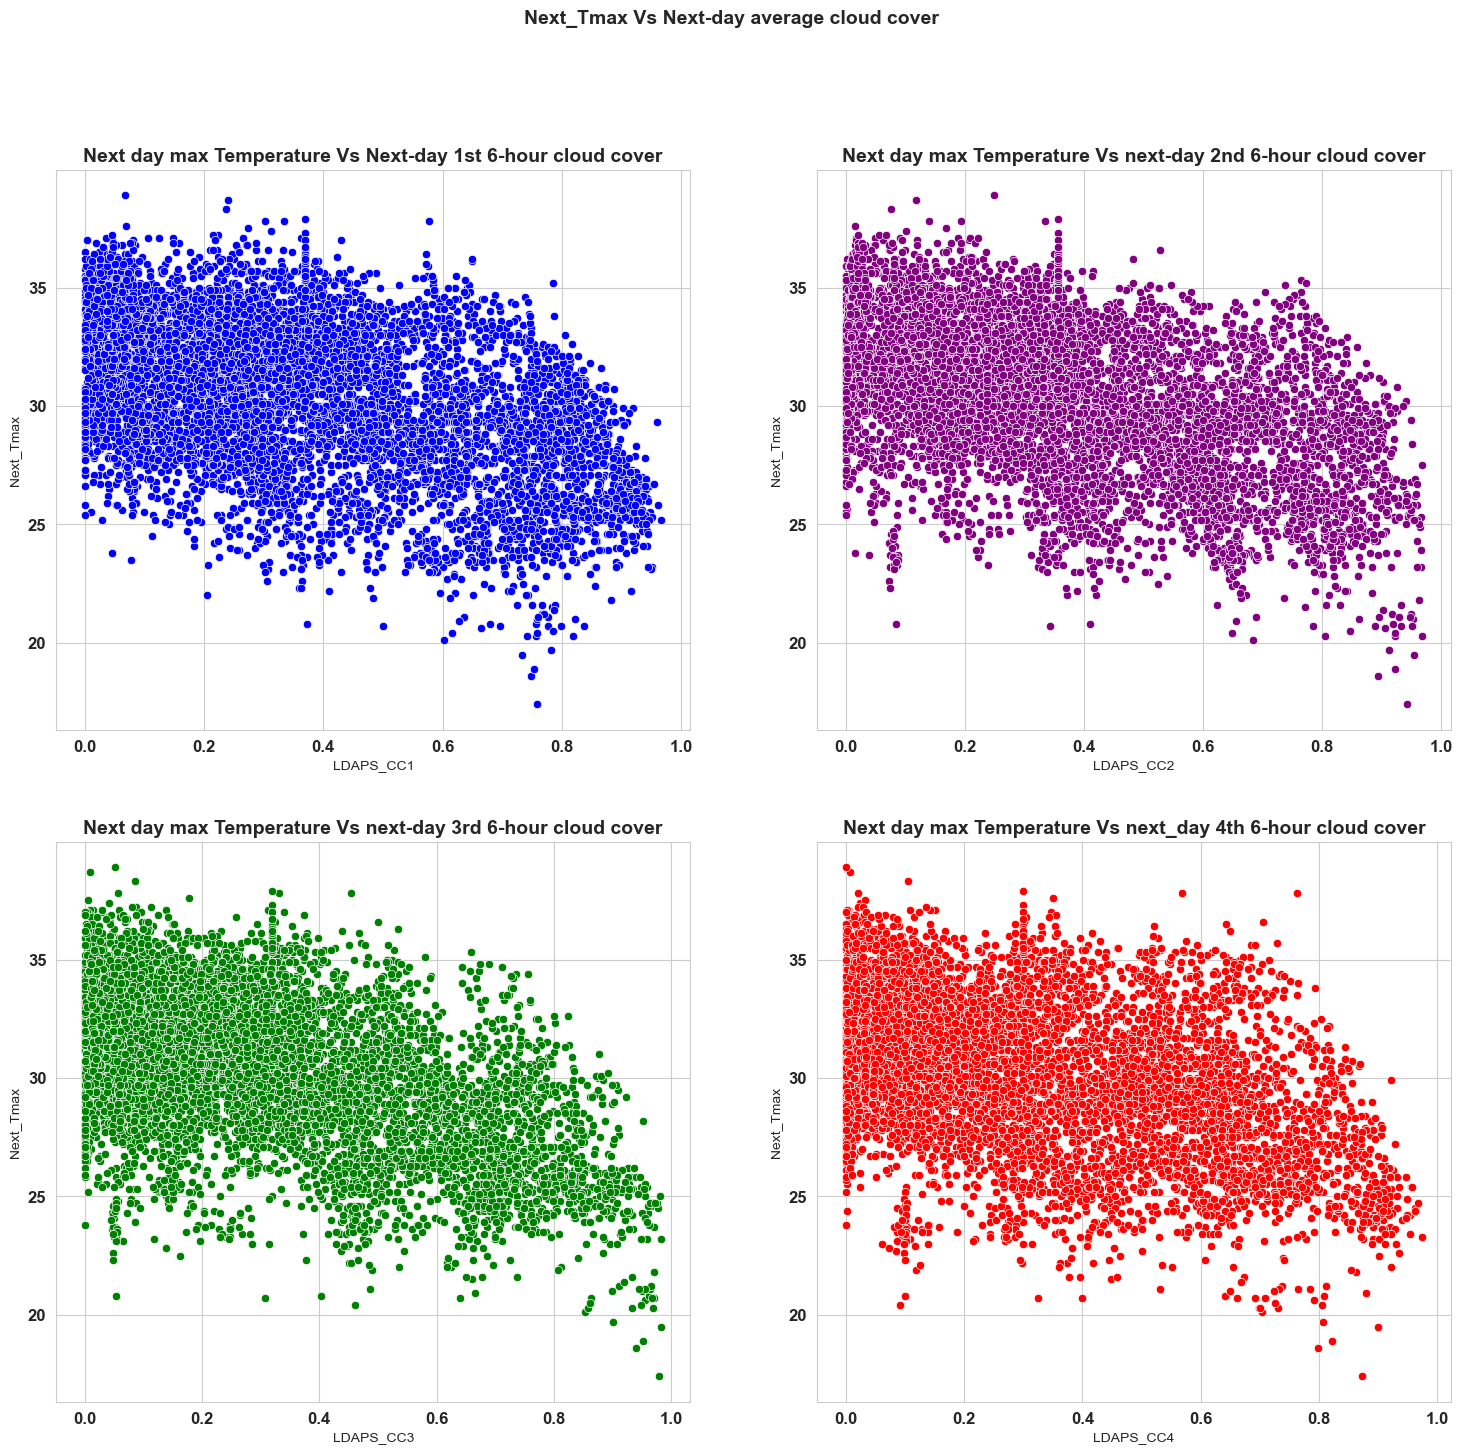

In [49]:
plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7723.0,13.008157,7.214034,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7723.0,29.769804,2.956157,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7723.0,23.225314,2.400841,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7723.0,56.740950,14.571702,19.794666,46.045780,55.266701,66.991833,98.524734
LDAPS_RHmax,7723.0,88.371500,7.155898,58.936283,84.291611,89.699196,93.702629,100.000153
LDAPS_Tmax_lapse,7723.0,29.616623,2.927713,17.624954,27.696327,29.664030,31.684914,38.542255
LDAPS_Tmin_lapse,7723.0,23.512221,2.330885,14.272646,22.114527,23.733589,25.134434,29.619342
LDAPS_WS,7723.0,7.095384,2.165080,2.882580,5.686500,6.564141,7.996720,21.857621
LDAPS_LH,7723.0,62.459258,33.505514,-13.603212,37.460390,57.299645,83.884903,213.414006
LDAPS_CC1,7723.0,0.368455,0.260963,0.000000,0.148259,0.319678,0.571472,0.967277


<Axes: >

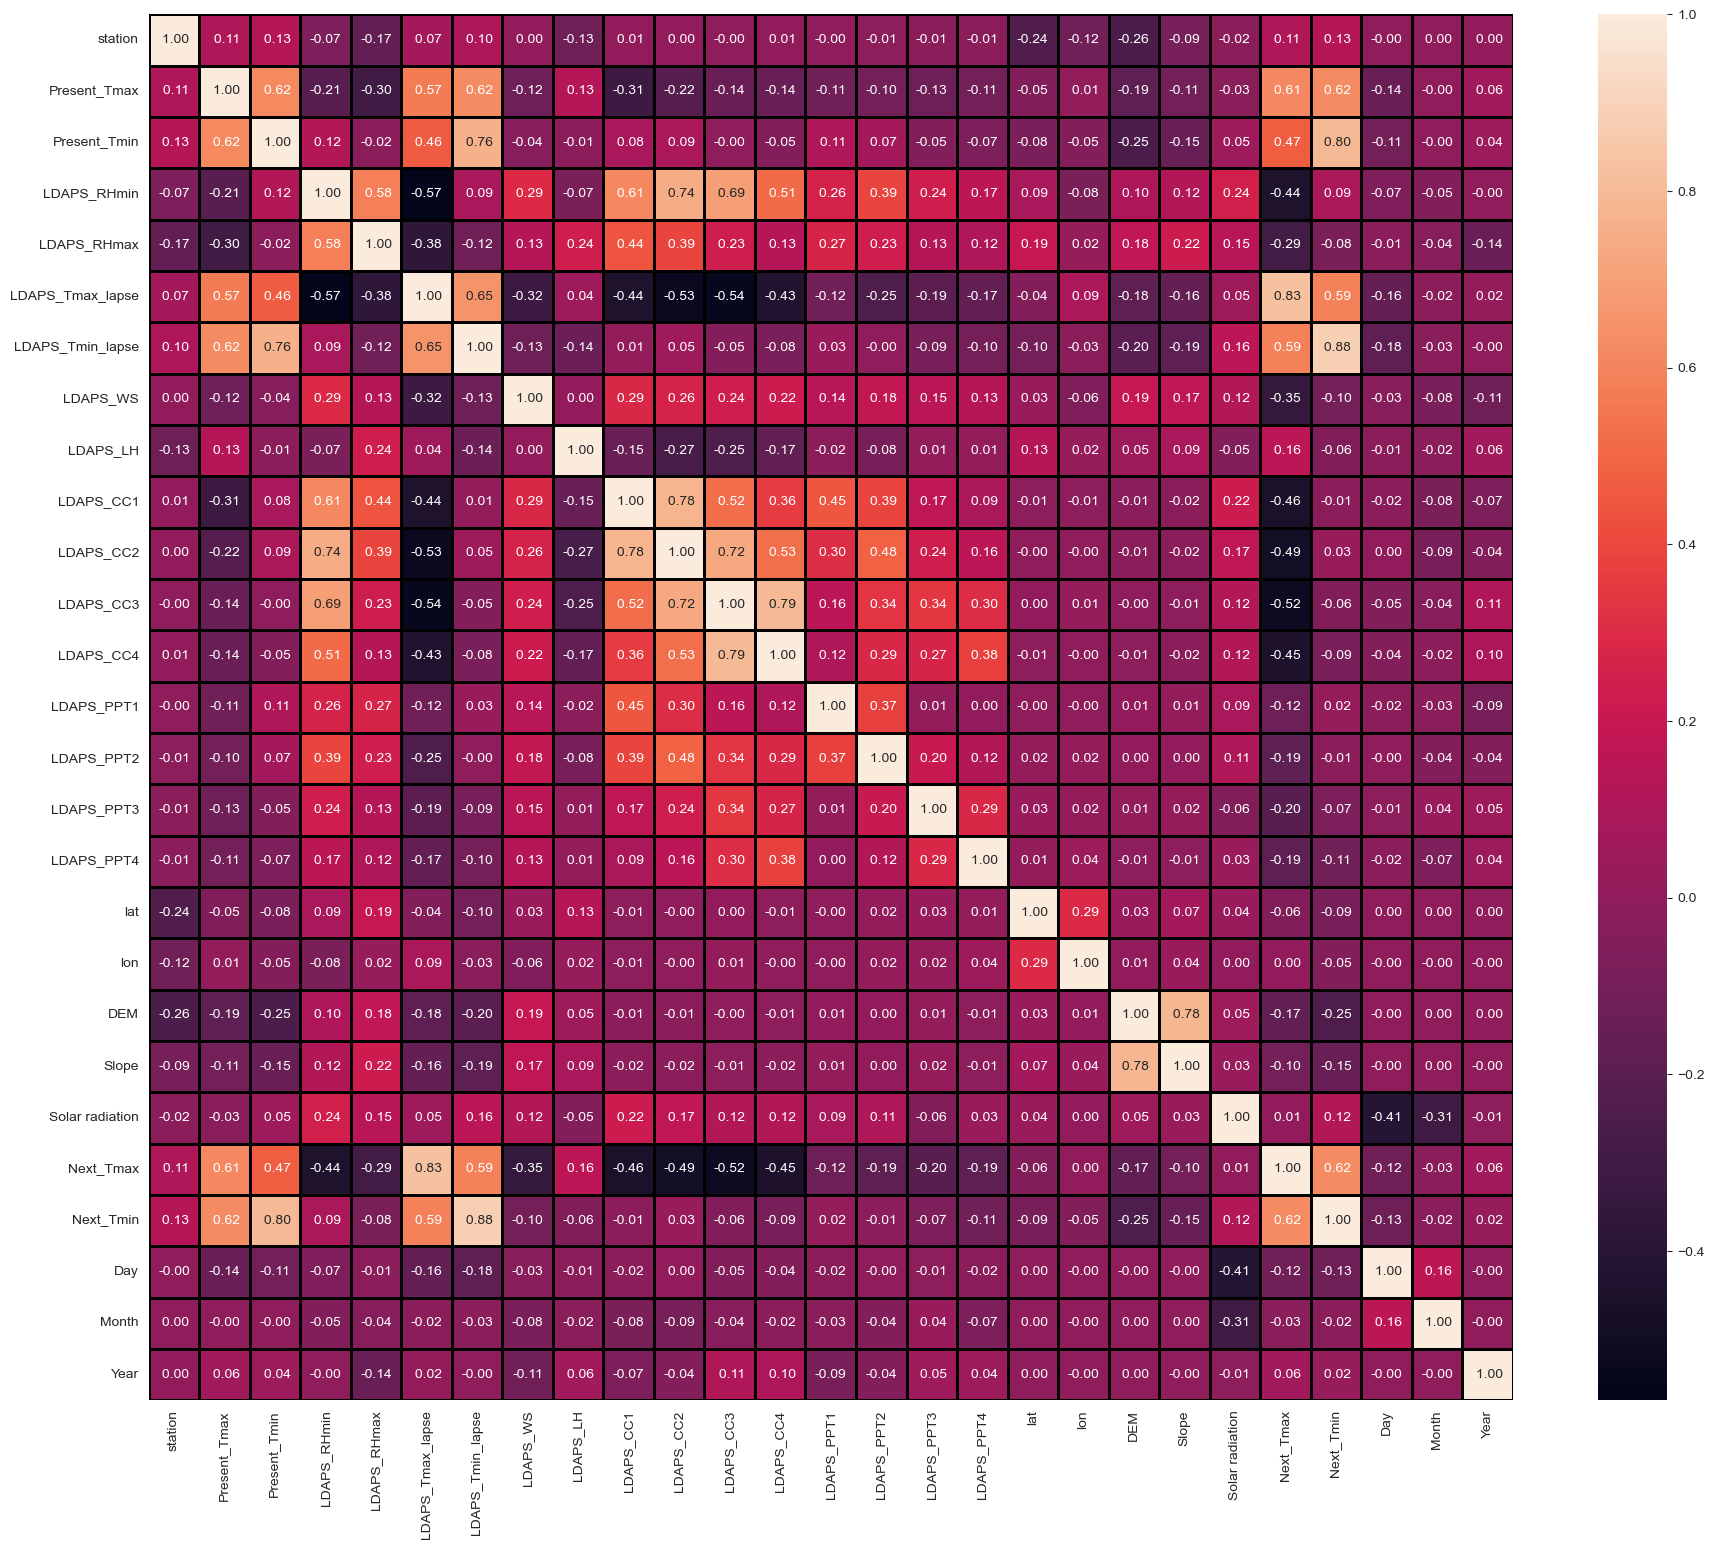

In [51]:
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='black',fmt=' .2f' )

Comment -

Present_Tmax & Prent_Tmin is highly correlated to Target Variable.

LDAPS_Tmax_lapes & LDAPS_Tmin_lapes is also highly correlated to Target Variables.

LDAPS_cc1,LDAPS_cc2,LDAPS_cc3 & LDAPS_cc4 are negativity correlated to target variables.

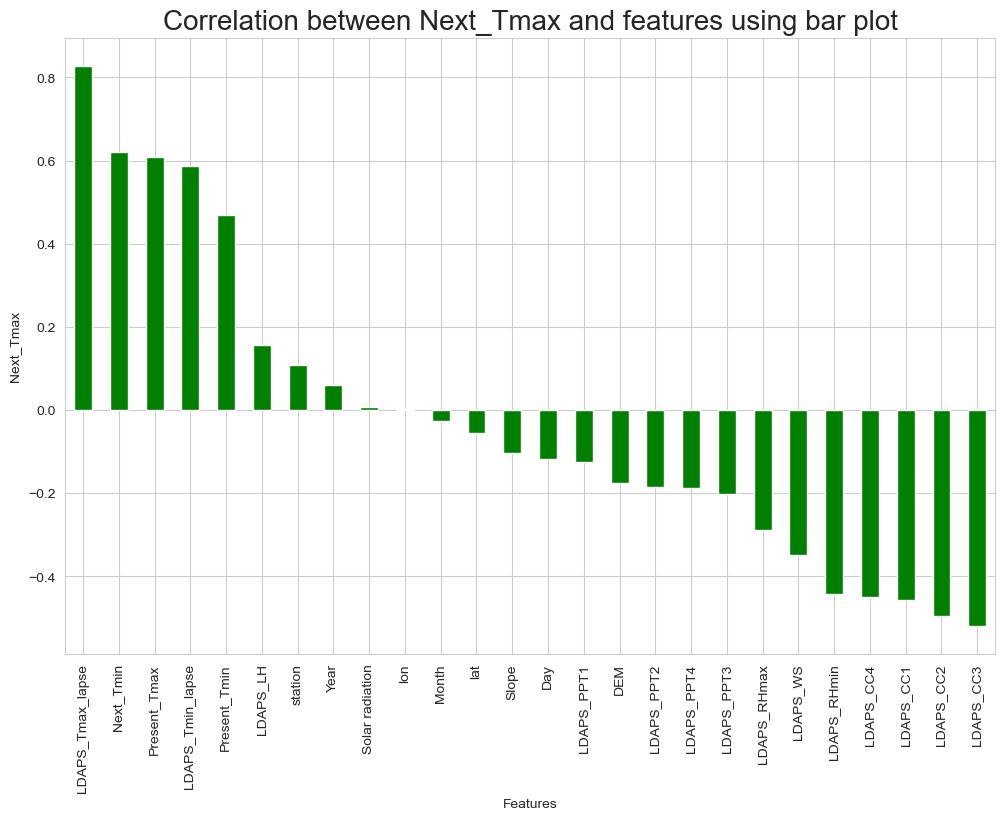

In [52]:
plt.figure(figsize=(12,8))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Next_Tmax',fontsize=10)
plt.title('Correlation between Next_Tmax and features using bar plot',fontsize=20)
plt.show()

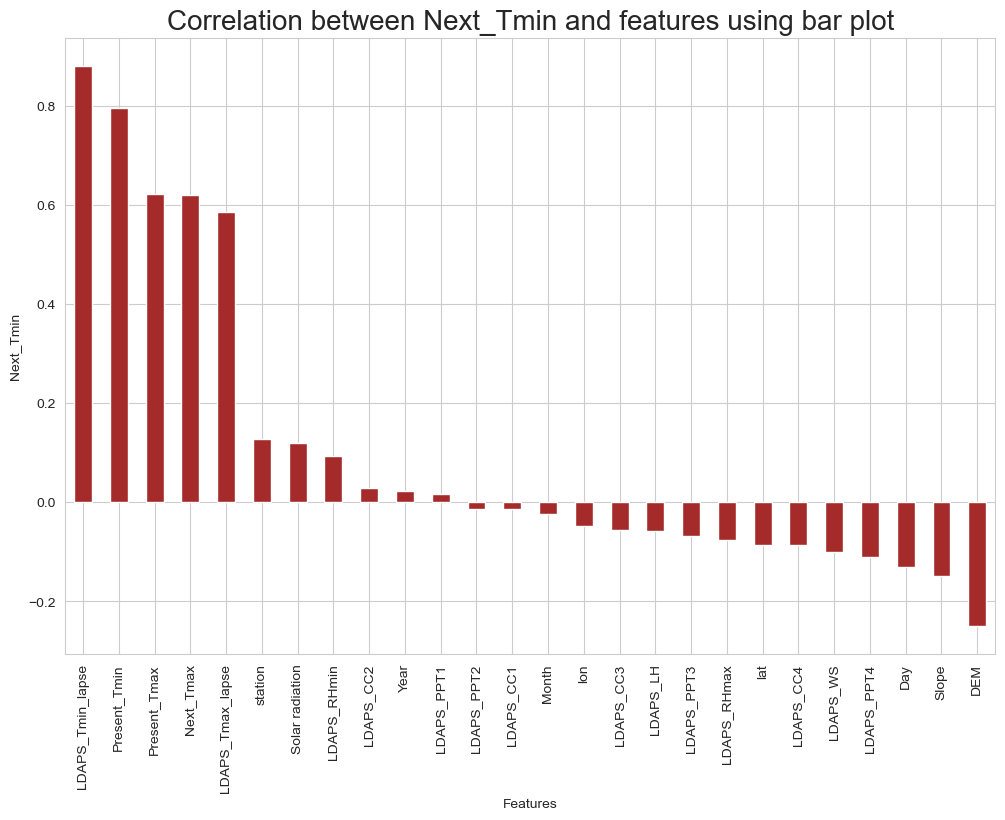

In [53]:
plt.figure(figsize=(12,8))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='brown')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Next_Tmin',fontsize=10)
plt.title('Correlation between Next_Tmin and features using bar plot',fontsize=20)
plt.show()

## Outlier Detection


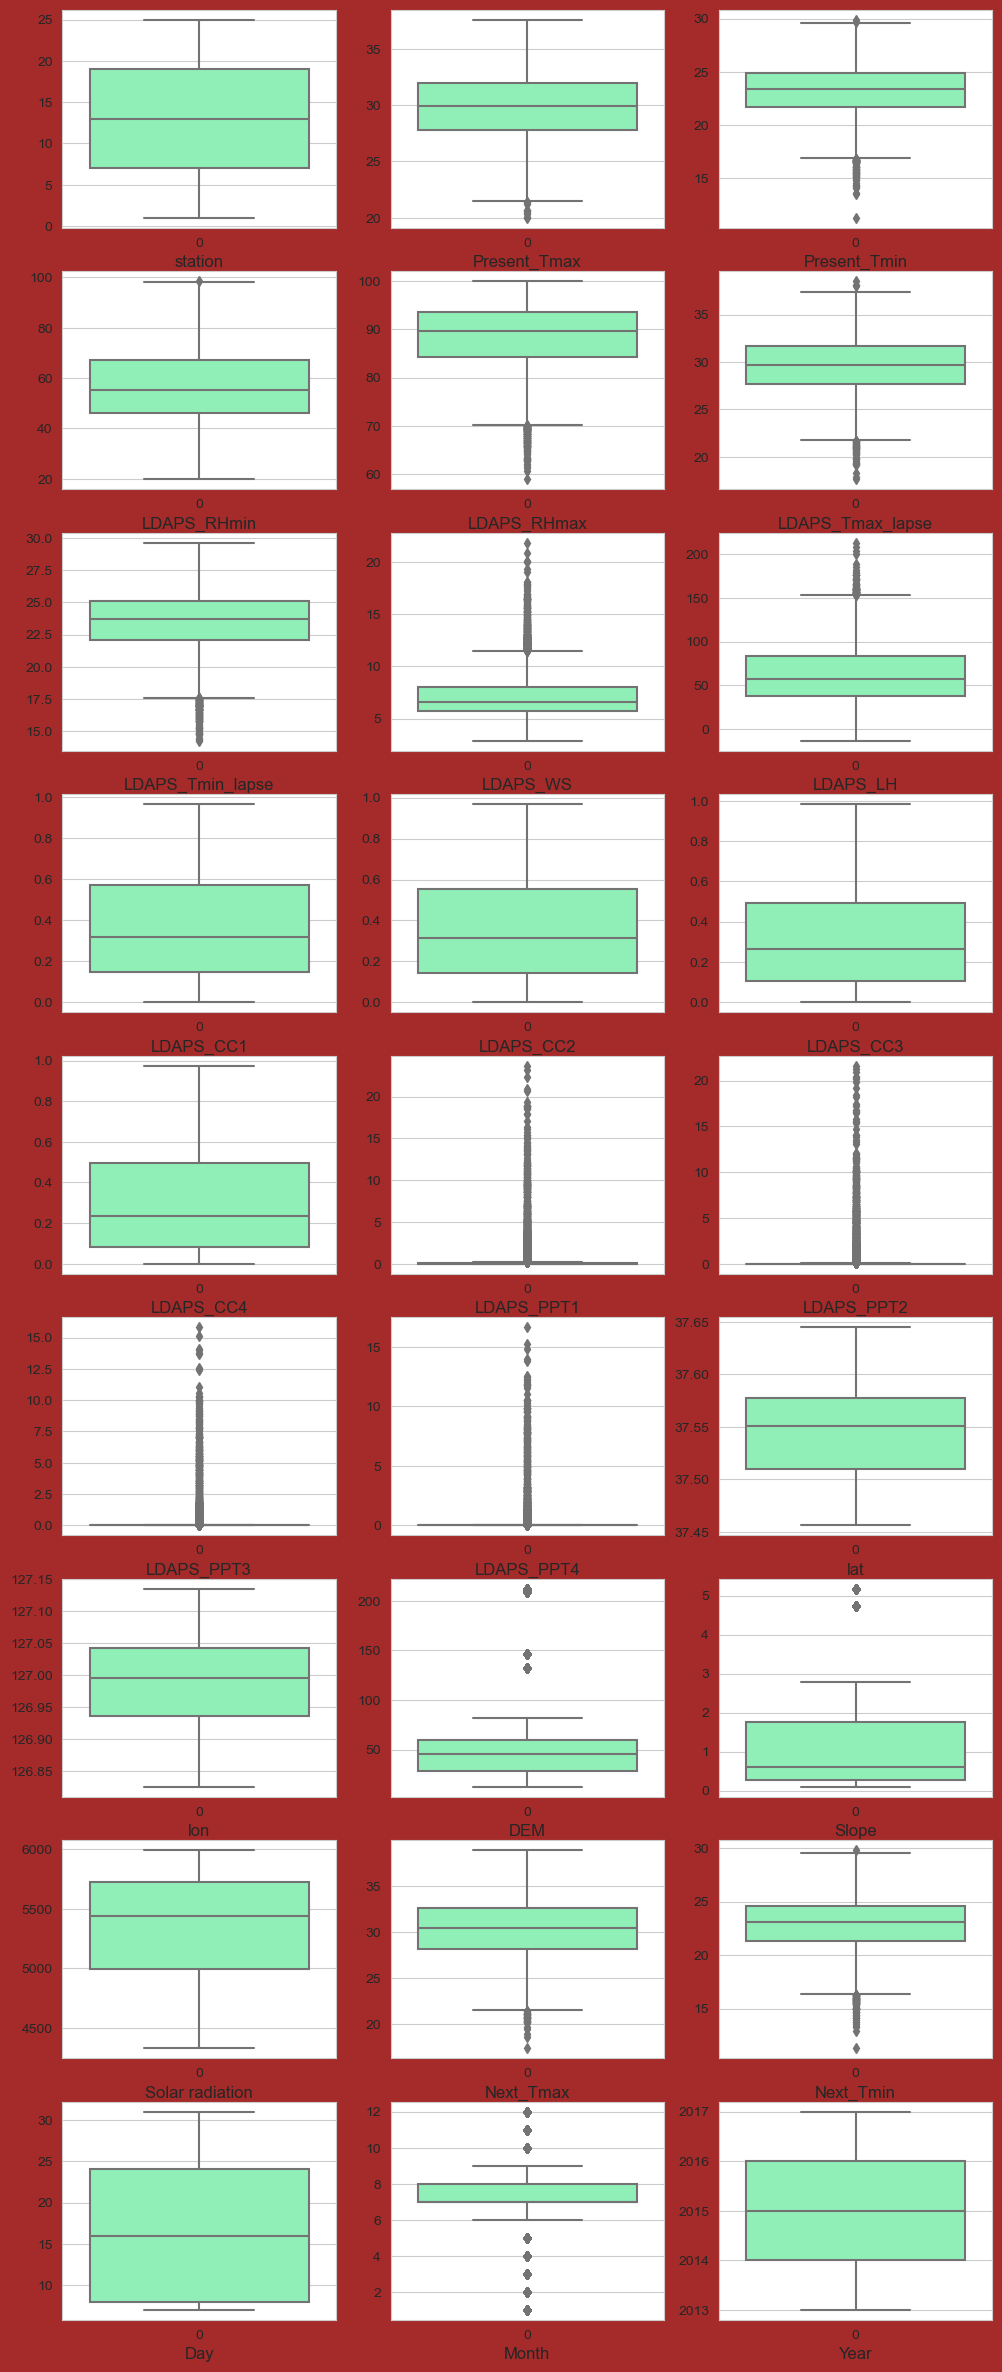

In [54]:
plt.figure(figsize=(12,30),facecolor='brown')
index=1
for column in df:
    if index <=27:
        ax = plt.subplot(9,3,index)
        sns.boxplot(df[column], palette='rainbow')
        plt.xlabel(column,fontsize=12)
    index+=1
plt.show()

## Removing of Outlier

In [55]:
import scipy.stats as stats
from scipy.stats import zscore
z_scores = stats.zscore(df)   

In [57]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.664663,0.361913,0.760330,0.103957,0.383605,0.526903,0.216792,0.127716,0.208712,0.515461,...,1.188219,0.004705,2.769916,1.113817,1.516820,0.376352,0.697875,1.653589,0.482333,1.412842
1,1.526035,0.720643,0.677021,0.307297,0.312101,0.079953,0.224302,0.648283,0.314053,0.547802,...,1.188219,0.512235,0.315833,0.543011,1.228776,0.071901,0.174319,1.653589,0.482333,1.412842
2,1.387408,0.619154,0.031110,0.552509,0.614626,0.162140,0.451966,0.442119,1.250210,0.609748,...,0.652150,0.840050,0.526781,0.723950,1.215358,0.264009,0.389511,1.653589,0.482333,1.412842
3,1.248780,0.754473,0.072765,0.102866,1.133710,0.030062,0.079822,0.667609,0.097539,0.582814,...,1.990336,0.386152,0.298273,0.931274,1.199997,0.456117,0.550605,1.653589,0.482333,1.412842
4,1.110152,0.551494,0.552057,0.038904,0.249269,0.171711,0.011044,0.628368,1.358261,0.831774,...,0.118067,1.810888,0.494902,0.549286,1.206027,0.296027,0.174319,1.653589,0.482333,1.412842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,1.107891,2.256387,2.259902,2.199745,1.412928,0.616195,2.235007,0.227319,1.577311,1.209265,...,0.118067,0.613101,0.655844,0.500695,2.065260,0.856623,2.107448,1.653589,0.411180,1.416506
7746,1.246518,2.459367,2.426521,1.828737,0.654255,0.994601,2.444802,0.613089,0.587626,1.157304,...,0.686036,1.193082,0.735600,0.820913,2.098405,0.728551,2.349089,1.653589,0.411180,1.416506
7747,1.385146,2.188728,2.551485,2.058894,1.327892,1.115121,2.032211,0.437179,0.286510,1.296900,...,0.149967,1.265534,0.853069,0.804716,2.094885,0.632496,1.946354,1.653589,0.411180,1.416506
7748,1.523774,2.188728,2.301557,2.244243,1.547988,0.890319,2.050299,0.255234,0.454217,1.274521,...,0.418002,1.038585,0.821617,0.755906,2.106400,0.536442,1.664439,1.653589,0.411180,1.416506


In [60]:
df.shape

(7723, 27)

### Checking Skewness of Dataset


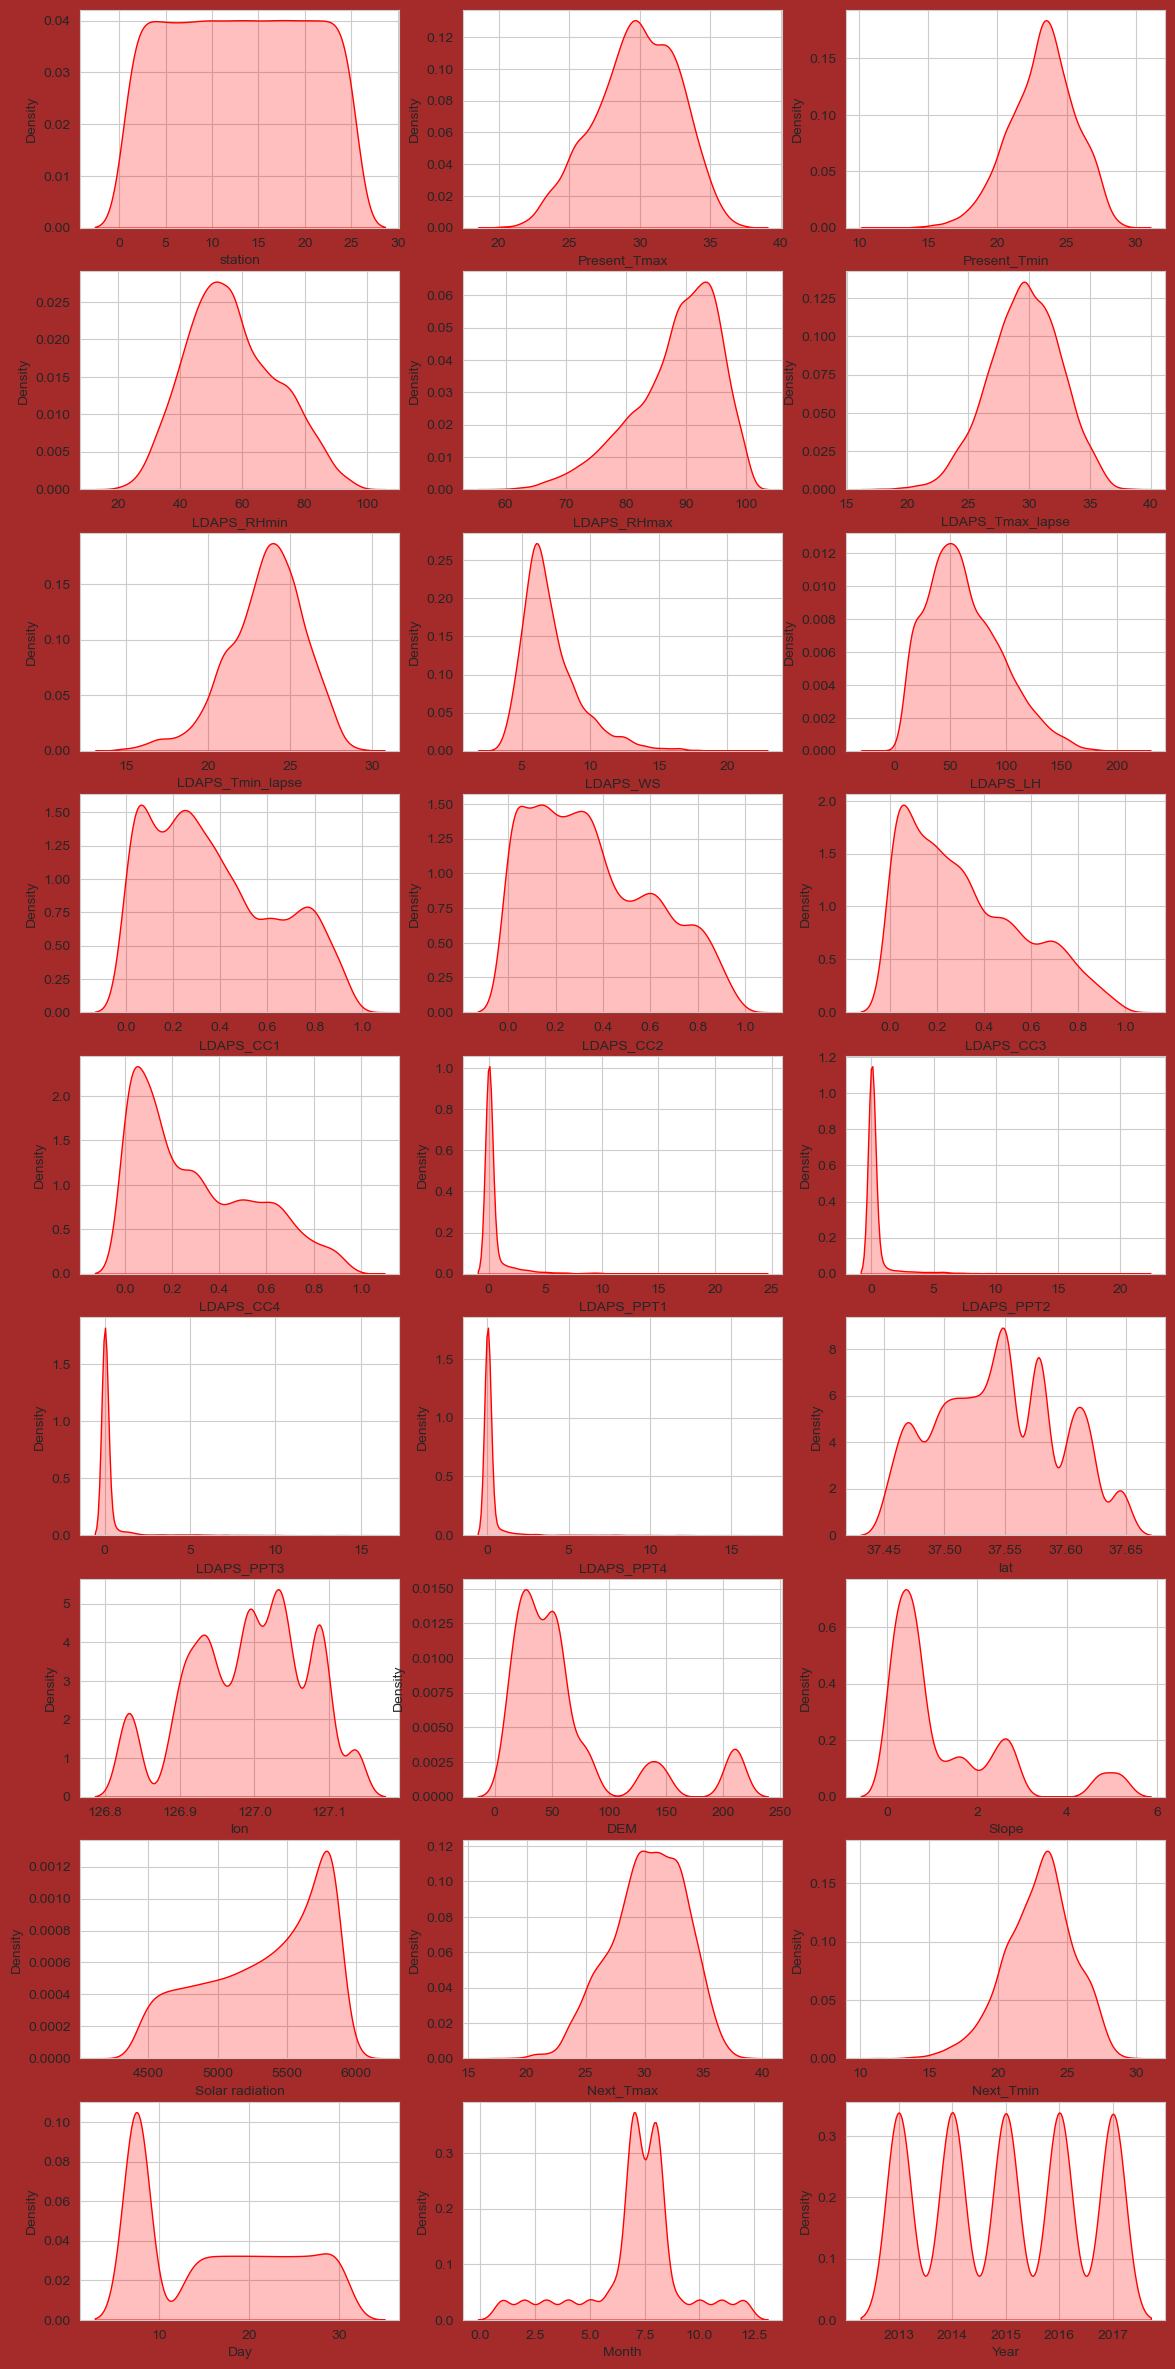

In [61]:
plt.figure(figsize=(14,30), facecolor='brown')
plotnumber=1
for column in df:
    if plotnumber <=27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [62]:
df.skew()

station            -0.002773
Present_Tmax       -0.263625
Present_Tmin       -0.356544
LDAPS_RHmin         0.302969
LDAPS_RHmax        -0.849762
LDAPS_Tmax_lapse   -0.223709
LDAPS_Tmin_lapse   -0.577906
LDAPS_WS            1.558527
LDAPS_LH            0.666802
LDAPS_CC1           0.460284
LDAPS_CC2           0.474829
LDAPS_CC3           0.641569
LDAPS_CC4           0.665622
LDAPS_PPT1          5.329705
LDAPS_PPT2          5.720478
LDAPS_PPT3          6.379430
LDAPS_PPT4          6.751450
lat                 0.086467
lon                -0.286647
DEM                 1.721745
Slope               1.560876
Solar radiation    -0.513584
Next_Tmax          -0.335372
Next_Tmin          -0.396184
Day                 0.245383
Month              -0.704237
Year                0.002105
dtype: float64

In [64]:
from scipy.stats import boxcox


left_skewed_columns = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse']

df[left_skewed_columns] = df[left_skewed_columns].apply(lambda x: boxcox(x + 1)[0])

In [66]:
right_skewed_columns =  ['LDAPS_WS', 'LDAPS_LH', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Year']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

df[right_skewed_columns] = scaler.fit_transform(df[right_skewed_columns].values)

## Spliting data into Feature and Target variable

In [67]:
feature_columns=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Day', 'Month', 'Year']
label_columns=['Next_Tmax']
labelcolumn=['Next_Tmin']

In [68]:
X = df[feature_columns]
Y = df[labelcolumn]
y = df[label_columns]

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Varience_inflation_factor
### Checking Multicollinearity

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF,Features
0,1.231748,station
1,2.923840,Present_Tmax
2,3.090152,Present_Tmin
3,6.512498,LDAPS_RHmin
4,2.606372,LDAPS_RHmax
5,7.046619,LDAPS_Tmax_lapse
6,6.901742,LDAPS_Tmin_lapse
7,1.238172,LDAPS_WS
8,1.491082,LDAPS_LH
9,5.662569,LDAPS_CC1


### Machine learning Model Next_Tmax

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [77]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8444928050416504 on Random State = 171


In [78]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.20,random_state=maxRS)


In [79]:
LR_model = LinearRegression()
RFR_model = RandomForestRegressor()
GB_model = GradientBoostingRegressor()
ADA_model = AdaBoostRegressor()
Bag_model = BaggingRegressor()
DT_model = DecisionTreeRegressor()
KNR_model = KNeighborsRegressor()

model = [LR_model, RFR_model, GB_model, ADA_model, Bag_model, DT_model, KNR_model]

In [80]:
for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_train = reg_model.score(x_train, y_train)
    pred = reg_model.predict(x_test)
    r2_test = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    
    print('Model:', reg_model)
    print('R-squared (Train):', r2_train)
    print('R-squared (Test):', r2_test)
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
    print('*' * 30)

Model: LinearRegression()
R-squared (Train): 0.8246881256037883
R-squared (Test): 0.8444928050416504
Mean Squared Error (MSE): 0.9490702261831937
Mean Absolute Error (MAE): 0.7697552204913386
******************************
Model: RandomForestRegressor()
R-squared (Train): 0.9872600141709603
R-squared (Test): 0.9185948118734966
Mean Squared Error (MSE): 0.49682100129449874
Mean Absolute Error (MAE): 0.5387695792880262
******************************
Model: GradientBoostingRegressor()
R-squared (Train): 0.9050307376010198
R-squared (Test): 0.8990660990633874
Mean Squared Error (MSE): 0.6160059681940752
Mean Absolute Error (MAE): 0.6161366109735432
******************************
Model: AdaBoostRegressor()
R-squared (Train): 0.8159814003450008
R-squared (Test): 0.8163684818616499
Mean Squared Error (MSE): 1.1207147457106745
Mean Absolute Error (MAE): 0.8586213734167559
******************************
Model: BaggingRegressor()
R-squared (Train): 0.980279716231477
R-squared (Test): 0.902514515

### Cross Validation

In [82]:
for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_test = r2_score(y_test, reg_model.predict(x_test))
    
    cv_r2 = cross_val_score(reg_model, X, Y, cv=5, scoring='r2').mean()
    
    print('Model:', reg_model)
    print('R-squared (Test):', r2_test)
    print(f'Cross-validation R-squared:', cv_r2)
    print('*' * 50)

Model: LinearRegression()
R-squared (Test): 0.8444928050416504
Cross-validation R-squared: 0.763340890259805
**************************************************
Model: RandomForestRegressor()
R-squared (Test): 0.9174210003274236
Cross-validation R-squared: 0.7752751277272772
**************************************************
Model: GradientBoostingRegressor()
R-squared (Test): 0.8991104992213268
Cross-validation R-squared: 0.7867520655888951
**************************************************
Model: AdaBoostRegressor()
R-squared (Test): 0.8165601508121144
Cross-validation R-squared: 0.7354311383507055
**************************************************
Model: BaggingRegressor()
R-squared (Test): 0.904922219458723
Cross-validation R-squared: 0.7548569674378754
**************************************************
Model: DecisionTreeRegressor()
R-squared (Test): 0.7865202712733832
Cross-validation R-squared: 0.5566824644044109
**************************************************
Model: KNeighbor

#### Random Forest Regressor is best model


### Hyperparameter tuning on RandomForest Regressor

In [83]:
n_estimator= [50,100,200] 
max_features= ['auto','sqrt']  
max_depth=[None, 10, 20]  
min_samples_split= [2, 5, 10] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [50, 100, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 4, 7]}

In [84]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [85]:
grid_search.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [86]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [87]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.9285517130659079

After Hyperparameter tuning Random Forest Regressor is giving 92% Acuuracy

Saving the Model


In [89]:
joblib.dump(grid_search.best_estimator_,"temprature_next_day_max.pkl")


['temprature_next_day_max.pkl']

### Machine learning Model Next_Tmin

In [91]:
new=df1.copy()

In [92]:
new.drop('Next_Tmin',axis=1, inplace=True)


In [93]:
new.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Day', 'Month', 'Year'],
      dtype='object')

In [94]:
sc=StandardScaler()
standard=sc.fit_transform(new)

In [95]:
standard=pd.DataFrame(standard, columns=new.columns)

In [96]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]

In [97]:
VIF

,features,vif
0,station,1.238756
1,Present_Tmax,2.824744
2,Present_Tmin,3.095734
3,LDAPS_RHmin,5.957648
4,LDAPS_RHmax,2.272748
5,LDAPS_Tmax_lapse,8.198983
6,LDAPS_Tmin_lapse,6.905327
7,LDAPS_WS,1.278254
8,LDAPS_LH,1.573655
9,LDAPS_CC1,3.554736


In [99]:
df1.drop(columns=['LDAPS_CC3','LDAPS_PPT2','LDAPS_CC1','LDAPS_WS','LDAPS_PPT3','LDAPS_PPT1','Month'],axis=1,inplace=True)


In [100]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]

In [101]:
VIF

,features,vif
0,station,1.238756
1,Present_Tmax,2.824744
2,Present_Tmin,3.095734
3,LDAPS_RHmin,5.957648
4,LDAPS_RHmax,2.272748
5,LDAPS_Tmax_lapse,8.198983
6,LDAPS_Tmin_lapse,6.905327
7,LDAPS_WS,1.278254
8,LDAPS_LH,1.573655
9,LDAPS_CC1,3.554736


In [102]:
X= df1.drop('Next_Tmin', axis=1)
Y=df1['Next_Tmin']

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [104]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.848694575124855 on Random State = 186


In [105]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.20,random_state=maxRS)

In [106]:
LR_model = LinearRegression()
RFR_model = RandomForestRegressor()
GB_model = GradientBoostingRegressor()
ADA_model = AdaBoostRegressor()
Bag_model = BaggingRegressor()
DT_model = DecisionTreeRegressor()
KNR_model = KNeighborsRegressor()

model = [LR_model, RFR_model, GB_model, ADA_model, Bag_model, DT_model, KNR_model]

In [107]:
for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_train = reg_model.score(x_train, y_train)
    pred = reg_model.predict(x_test)
    r2_test = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    
    print('Model:', reg_model)
    print('R-squared (Train):', r2_train)
    print('R-squared (Test):', r2_test)
    print('Mean Squared Error (MSE):', mse)
    print('Mean Absolute Error (MAE):', mae)
    print('*' * 30)

Model: LinearRegression()
R-squared (Train): 0.829568027332259
R-squared (Test): 0.848694575124855
Mean Squared Error (MSE): 0.8741721742777663
Mean Absolute Error (MAE): 0.7429666207386134
******************************
Model: RandomForestRegressor()
R-squared (Train): 0.9863651409834385
R-squared (Test): 0.906049459200203
Mean Squared Error (MSE): 0.5428024050909093
Mean Absolute Error (MAE): 0.5604807272727274
******************************
Model: GradientBoostingRegressor()
R-squared (Train): 0.9006022834383409
R-squared (Test): 0.8911876313579746
Mean Squared Error (MSE): 0.6286671146299312
Mean Absolute Error (MAE): 0.6253511396767631
******************************
Model: AdaBoostRegressor()
R-squared (Train): 0.7974183534562757
R-squared (Test): 0.8019608848349548
Mean Squared Error (MSE): 1.1441776396234895
Mean Absolute Error (MAE): 0.8748096565557556
******************************
Model: BaggingRegressor()
R-squared (Train): 0.9800702153334552
R-squared (Test): 0.894249558577

In [108]:
for reg_model in model:
    reg_model.fit(x_train, y_train)
    r2_test = r2_score(y_test, reg_model.predict(x_test))
    
    cv_r2 = cross_val_score(reg_model, X, Y, cv=5, scoring='r2').mean()
    
    print('Model:', reg_model)
    print('R-squared (Test):', r2_test)
    print(f'Cross-validation R-squared:', cv_r2)
    print('*' * 50)

Model: LinearRegression()
R-squared (Test): 0.848694575124855
Cross-validation R-squared: 0.7918320464122102
**************************************************
Model: RandomForestRegressor()
R-squared (Test): 0.9073378095246494
Cross-validation R-squared: 0.7850288292787097
**************************************************
Model: GradientBoostingRegressor()
R-squared (Test): 0.8911842971506156
Cross-validation R-squared: 0.8038789155036467
**************************************************
Model: AdaBoostRegressor()
R-squared (Test): 0.8055203668121818
Cross-validation R-squared: 0.7241065319921193
**************************************************
Model: BaggingRegressor()
R-squared (Test): 0.8973122306747457
Cross-validation R-squared: 0.7594568137653926
**************************************************
Model: DecisionTreeRegressor()
R-squared (Test): 0.7678052915112366
Cross-validation R-squared: 0.5332516714135803
**************************************************
Model: KNeighbo

#### Random Forest Regressor is the best model

### Hyperparameter tuning on RandomForest Regressor


In [109]:
n_estimator= [50,100,200] 
max_features= ['auto','sqrt']  
max_depth=[None, 10, 20]  
min_samples_split= [2, 5, 10] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [50, 100, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 4, 7]}

In [110]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [111]:
grid_search.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [112]:
grid_search.best_params_


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [113]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.9187340310021429

### Saving the model

In [114]:
joblib.dump(grid_search.best_estimator_,"temprature_next_day_min.pkl")

['temprature_next_day_min.pkl']